<a href="https://colab.research.google.com/github/gayoung-k/object-detection-learning-notes/blob/main/opencv_image_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Image and Video Processing with OpenCV

* Briefly explore various image libraries used in Python and understand their differences from OpenCV
* Understand OpenCV’s single-image processing methods
* Understand OpenCV’s video processing methods


#### Understanding OpenCV Image Processing and Comparison with Other Packages


#### Load images with PIL package

In [ ]:
!mkdir ./data
!wget -O /content/data/beatles01.jpg https://raw.githubusercontent.com/gayoung-k/object-detection-learning-notes/main/images/beatles01.jpg

mkdir: cannot create directory ‘./data’: File exists
--2025-09-03 20:49:59--  https://raw.githubusercontent.com/gayoung-k/object-detection-learning-notes/main/images/beatles01.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 383118 (374K) [image/jpeg]
Saving to: ‘/content/data/beatles01.jpg’

/content/data/beatl 100%[===================>] 374.14K  1.72MB/s    in 0.2s    

2025-09-03 20:50:00 (1.72 MB/s) - ‘/content/data/beatles01.jpg’ saved [383118/383118]



image type: <class 'PIL.JpegImagePlugin.JpegImageFile'>


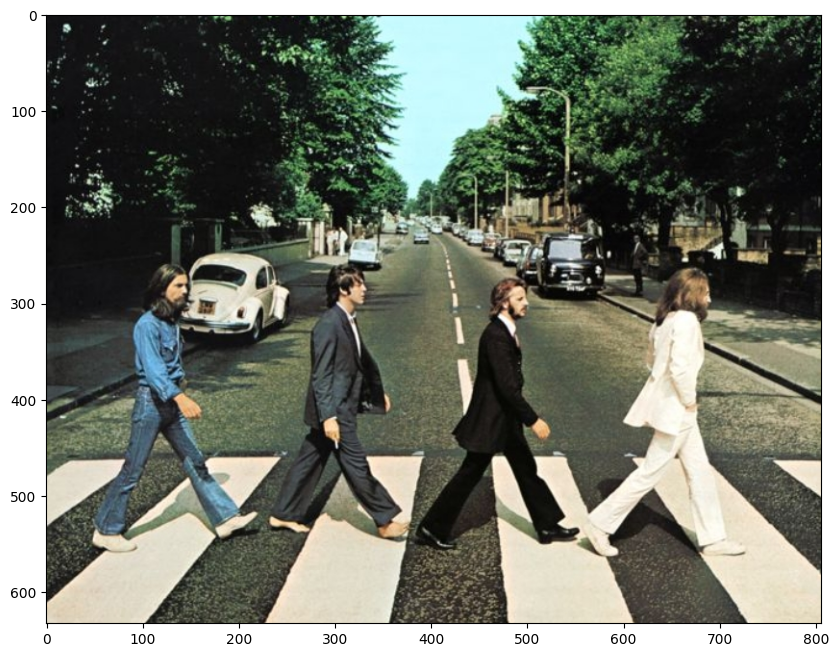

In [ ]:
import matplotlib.pyplot as plt
import os
%matplotlib inline

from PIL import Image

# PIL reads an image file with open() and creates it as an ImageFile object.
pil_image = Image.open('/content/data/beatles01.jpg')
print('image type:', type(pil_image))

plt.figure(figsize=(10, 10))
plt.imshow(pil_image)
#plt.show()


#### Loading Images with skimage (scikit-image)

* skimage uses `imread()` to read an original RGB image and returns it as an RGB NumPy array.


sk_image type: <class 'numpy.ndarray'>  sk_image shape: (633, 806, 3)


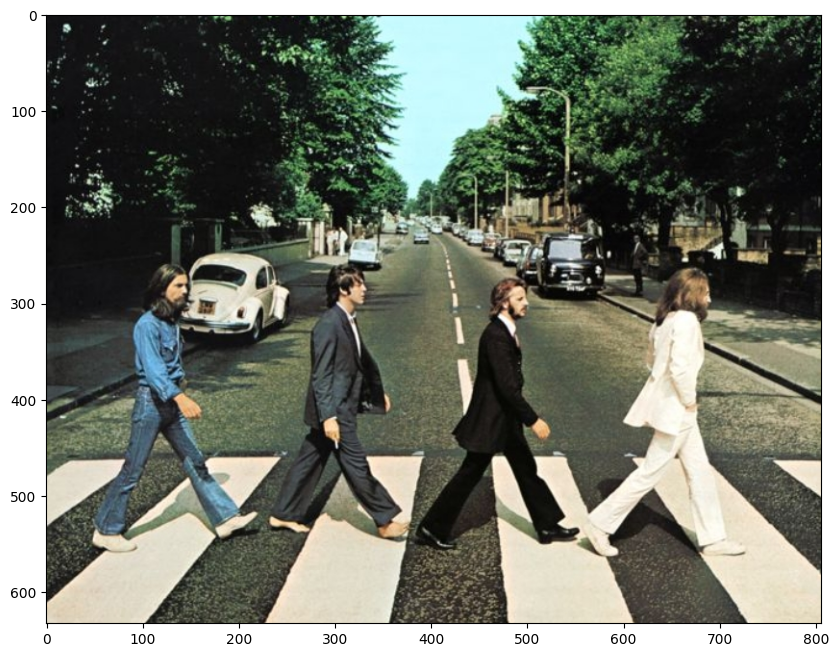

In [ ]:
from skimage import io

# skimage uses imread() to read an image and return it as a NumPy array.
sk_image = io.imread('/content/data/beatles01.jpg')
print('sk_image type:', type(sk_image), ' sk_image shape:', sk_image.shape)

plt.figure(figsize=(10, 10))
plt.imshow(sk_image)
#plt.show()


#### Loading Images with OpenCV

* OpenCV uses `imread()` to read an original RGB image and returns it as a NumPy array in BGR format.
* When using OpenCV’s `imwrite()`, the BGR image array is automatically converted back to RGB when writing to a file, so the user does not need to worry about the RGB → BGR → RGB conversions.


cv_image type: <class 'numpy.ndarray'>  cv_image shape: (633, 806, 3)


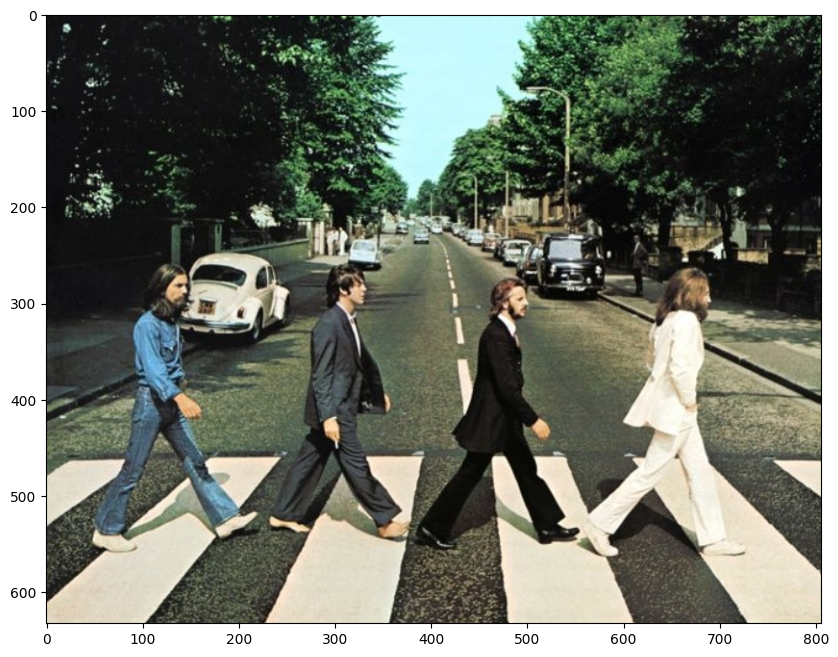

In [ ]:
import cv2

cv2_image = cv2.imread('/content/data/beatles01.jpg')
cv2.imwrite('/content/data/beatles02_cv.jpg', cv2_image)
print('cv_image type:', type(cv2_image), ' cv_image shape:', cv2_image.shape)

plt.figure(figsize=(10, 10))
img = plt.imread('/content/data/beatles02_cv.jpg')
plt.imshow(img)
#plt.show()


#### Visualizing the BGR Image NumPy Array Returned by OpenCV’s imread()

* Since OpenCV’s `imread()` converts RGB to BGR, the displayed image will not appear as intended.


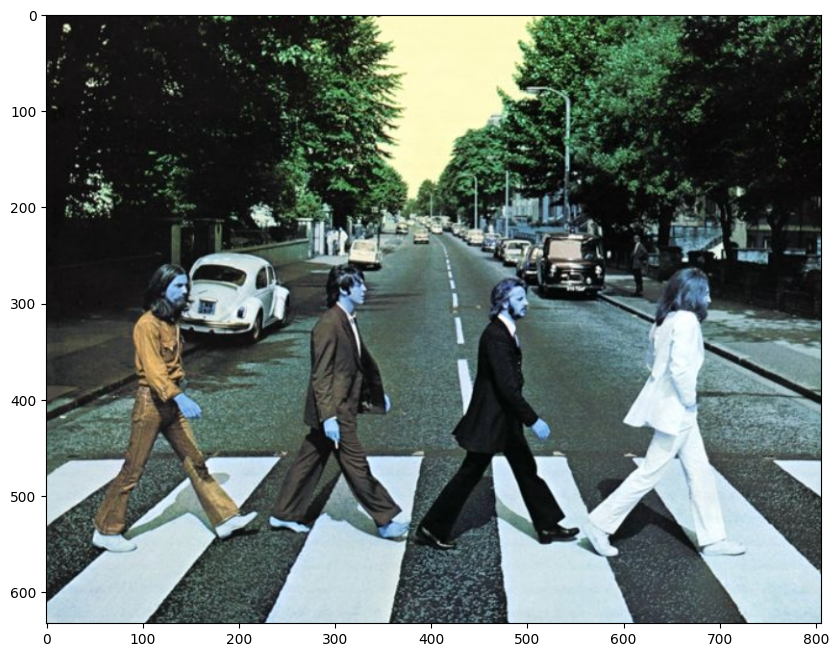

In [ ]:
cv2_image = cv2.imread('/content/data/beatles01.jpg')

plt.figure(figsize=(10, 10))
plt.imshow(cv2_image)
plt.show()

(633, 806, 3)


array([[ 18,  18,  18, ...,  47,  39,  64],
       [ 19,  19,  18, ...,  72,  41,  37],
       [ 18,  18,  18, ...,  84,  56,  41],
       ...,
       [225, 226, 228, ..., 231, 230, 229],
       [225, 225, 226, ..., 229, 229, 227],
       [225, 225, 224, ..., 227, 227, 227]], dtype=uint8)
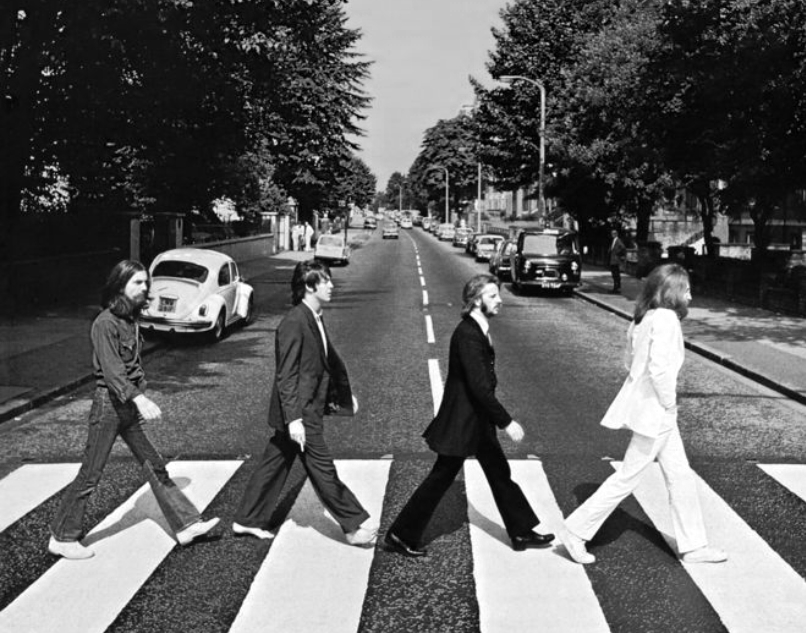

In [ ]:
sk_image = io.imread('/content/data/beatles01.jpg')
print(sk_image.shape)
sk_image[:, :, 0]

<class 'numpy.ndarray'>
(633, 806, 3)


array([[ 19,  19,  20, ...,  47,  39,  64],
       [ 20,  20,  20, ...,  71,  40,  36],
       [ 20,  20,  20, ...,  82,  54,  40],
       ...,
       [198, 199, 201, ..., 190, 189, 188],
       [198, 198, 199, ..., 188, 188, 186],
       [199, 199, 198, ..., 186, 186, 186]], dtype=uint8)
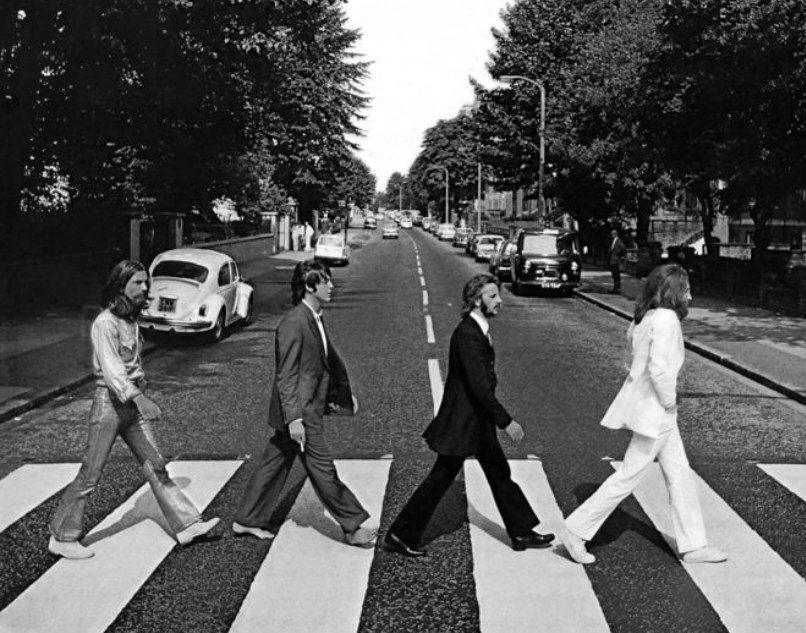

In [ ]:
cv2_image = cv2.imread('/content/data/beatles01.jpg')
print(type(cv2_image))
print(cv2_image.shape)
cv2_image[:, :, 0]

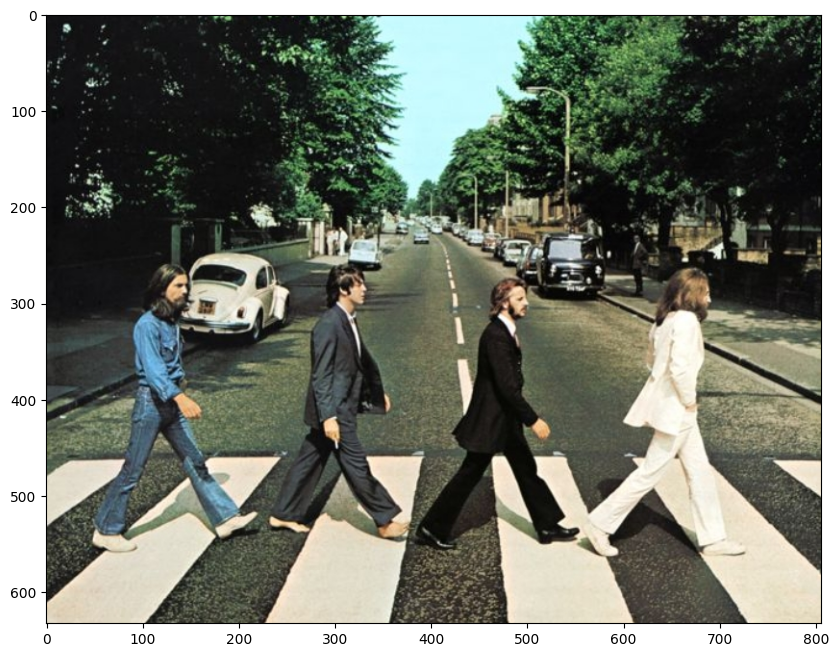

In [ ]:
cv2_image = cv2.imread('/content/data/beatles01.jpg')
draw_image = cv2.cvtColor(cv2_image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))
plt.imshow(draw_image)
plt.show()

#### OpenCV Video Processing

* OpenCV provides simple APIs for video processing.
* The **VideoCapture** object allows capturing and processing video streams frame by frame.
* The **VideoWriter** object enables writing frames read by VideoCapture into a video file.


In [1]:
!mkdir -p ./data
!wget -O /content/data/Night_Day_Chase.mp4 https://raw.githubusercontent.com/gayoung-k/object-detection-learning-notes/main/videos/Night_Day_Chase.mp4


--2025-09-04 00:38:32--  https://raw.githubusercontent.com/gayoung-k/object-detection-learning-notes/main/videos/Night_Day_Chase.mp4
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23351010 (22M) [application/octet-stream]
Saving to: ‘/content/data/Night_Day_Chase.mp4’

/content/data/Night 100%[===================>]  22.27M   147MB/s    in 0.2s    

2025-09-04 00:38:33 (147 MB/s) - ‘/content/data/Night_Day_Chase.mp4’ saved [23351010/23351010]



In [2]:
import cv2

video_input_path = '/content/data/Night_Day_Chase.mp4'
# On Linux, the video output file extension must be set to .avi
video_output_path = '/content/data/Night_Day_Chase_out.mp4'

cap = cv2.VideoCapture(video_input_path)
# Set codec to *'XVID'
codec = cv2.VideoWriter_fourcc(*'XVID')

vid_size = (round(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), round(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))  # (200, 400)
vid_fps = cap.get(cv2.CAP_PROP_FPS)

vid_writer = cv2.VideoWriter(video_output_path, codec, vid_fps, vid_size)

frame_cnt = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print('Total number of frames:', frame_cnt, 'FPS:', round(vid_fps), 'Frame size:', vid_size)


Total number of frames: 1383 FPS: 28 Frame size: (1216, 516)


In [3]:
import time

green_color = (0, 255, 0)
red_color = (0, 0, 255)

start = time.time()
index = 0
while True:
    hasFrame, img_frame = cap.read()
    if not hasFrame:
        print('No more frames to process.')
        break
    index += 1
    print('frame :', index, 'processing complete')

    cv2.rectangle(img_frame, (300, 100, 800, 400), color=green_color, thickness=2)
    caption = "frame:{}".format(index)
    cv2.putText(img_frame, caption, (300, 95), cv2.FONT_HERSHEY_SIMPLEX, 0.7, red_color, 1)

    vid_writer.write(img_frame)

print('Completed writing time:', round(time.time() - start, 4))
vid_writer.release()
cap.release()


frame : 1 processing complete
frame : 2 processing complete
frame : 3 processing complete
frame : 4 processing complete
frame : 5 processing complete
frame : 6 processing complete
frame : 7 processing complete
frame : 8 processing complete
frame : 9 processing complete
frame : 10 processing complete
frame : 11 processing complete
frame : 12 processing complete
frame : 13 processing complete
frame : 14 processing complete
frame : 15 processing complete
frame : 16 processing complete
frame : 17 processing complete
frame : 18 processing complete
frame : 19 processing complete
frame : 20 processing complete
frame : 21 processing complete
frame : 22 processing complete
frame : 23 processing complete
frame : 24 processing complete
frame : 25 processing complete
frame : 26 processing complete
frame : 27 processing complete
frame : 28 processing complete
frame : 29 processing complete
frame : 30 processing complete
frame : 31 processing complete
frame : 32 processing complete
frame : 33 proces